In [1]:
# 1. Setup: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:
# 2. Load and Prepare the Dataset
# For this exercise, we'll use the classic Iris dataset.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Optional: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

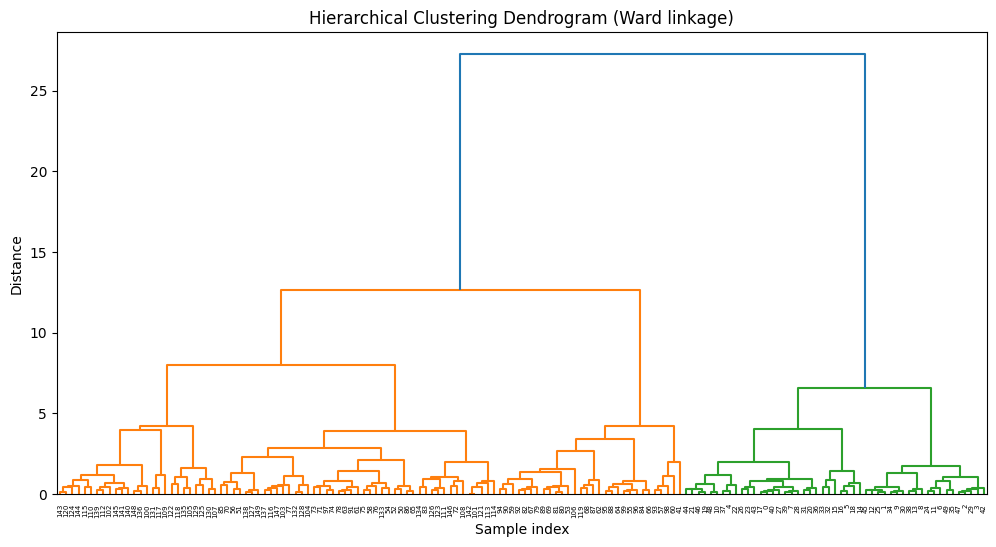

In [3]:
# 3. Compute Linkage Matrix & Plot Dendrogram
# Compute the linkage matrix using Ward's method
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [4]:
# 4. Choose Number of Clusters & Assign Labels
#Let’s say we want to create 3 clusters:
num_clusters = 3
labels = fcluster(linked, num_clusters, criterion='maxclust')
df['cluster'] = labels
print(df['cluster'].value_counts())

cluster
3    71
1    49
2    30
Name: count, dtype: int64


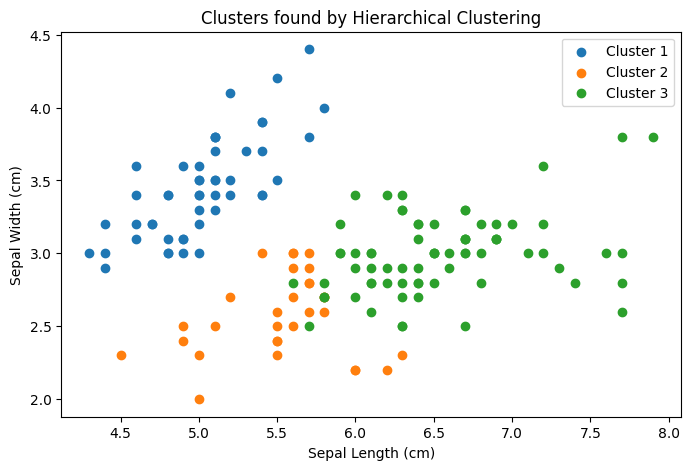

In [5]:
# 5. Visualize the Clusters
# We'll use the first two features for a quick cluster plot:
plt.figure(figsize=(8, 5))
for cluster in range(1, num_clusters+1):
    plt.scatter(df[df['cluster']==cluster]['sepal length (cm)'],
                df[df['cluster']==cluster]['sepal width (cm)'],
                label=f'Cluster {cluster}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters found by Hierarchical Clustering')
plt.legend()
plt.show()

In [7]:
# 6.
# Add true species labels
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Cross-tab: Actual species vs. Predicted clusters
ct = pd.crosstab(df['cluster'], df['species'])
print("Cross-tabulation of predicted clusters and actual species:\n")
print(ct)


Cross-tabulation of predicted clusters and actual species:

species  setosa  versicolor  virginica
cluster                               
1            49           0          0
2             1          27          2
3             0          23         48


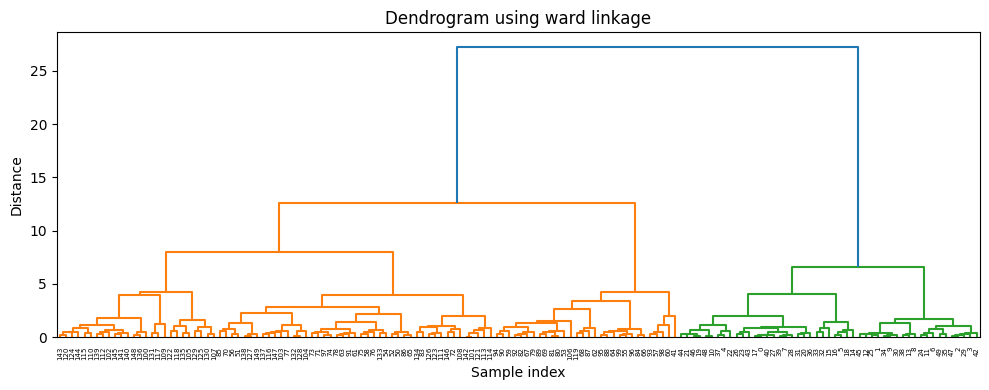

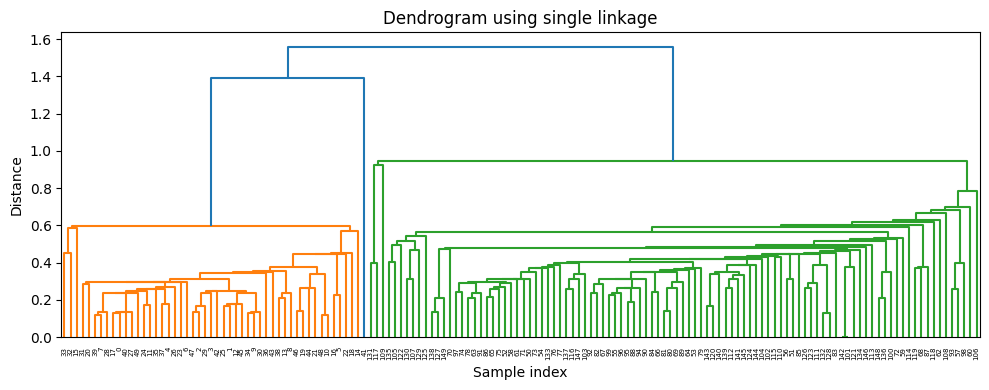

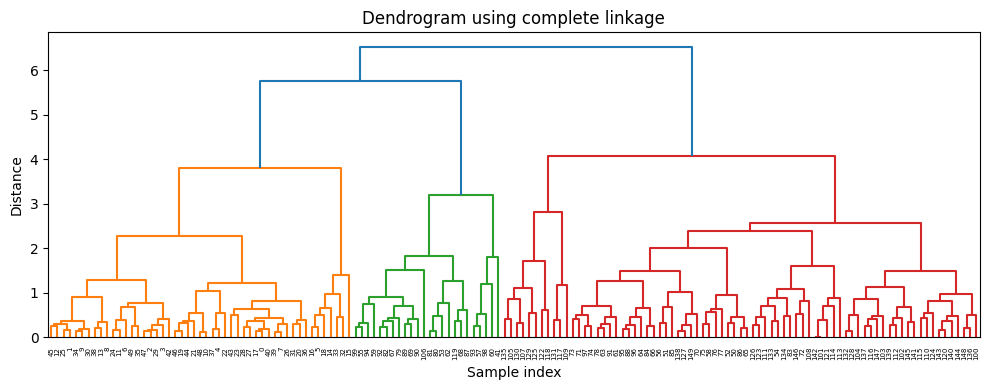

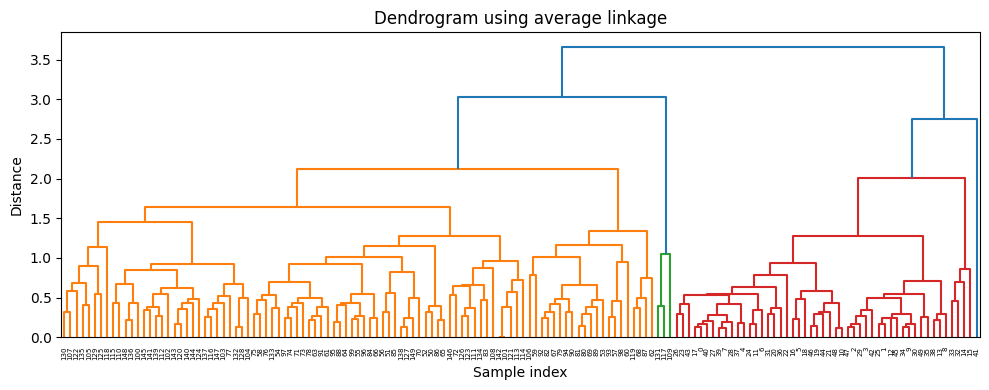

In [8]:
linkage_methods = ['ward', 'single', 'complete', 'average']

for method in linkage_methods:
    linked = linkage(scaled_data, method=method)
    plt.figure(figsize=(10, 4))
    plt.title(f'Dendrogram using {method} linkage')
    dendrogram(linked, distance_sort='descending', show_leaf_counts=True)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()


In [9]:
for k in [2, 3, 4]:
    labels = fcluster(linked, k, criterion='maxclust')
    df[f'cluster_{k}'] = labels
    print(f"\nNumber of samples in each cluster for k={k}:\n", df[f'cluster_{k}'].value_counts())



Number of samples in each cluster for k=2:
 cluster_2
2    100
1     50
Name: count, dtype: int64

Number of samples in each cluster for k=3:
 cluster_3
3    97
1    50
2     3
Name: count, dtype: int64

Number of samples in each cluster for k=4:
 cluster_4
4    97
1    49
3     3
2     1
Name: count, dtype: int64
